# Задание 3

## Локальное выравнивание гистограммы на изображении в LAB на L компоненте

### Библиотеки

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Загрузка изображения и конвертация в LAB

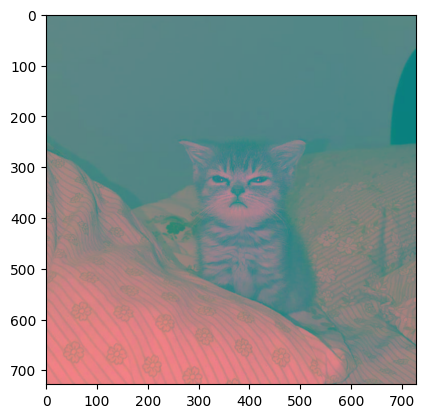

In [3]:
img = cv2.imread("pic.jpg")
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
plt.imshow(img_lab)

Построение диаграммы

- Cиний - L
- Зеленый - А
- Красный - B

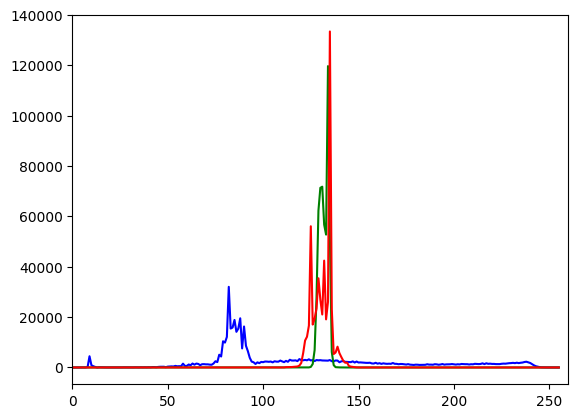

In [4]:
color = ("b", "g", "r")
for i, color in enumerate(color):
    hist = cv2.calcHist([img_lab], [i], None, [256], [0, 256], accumulate=False)
    plt.plot(hist, color = color)
    plt.xlim([0, 260])
plt.show()

Построение кумулятивной диаграммы


- Cиний - L
- Зеленый - А
- Красный - B

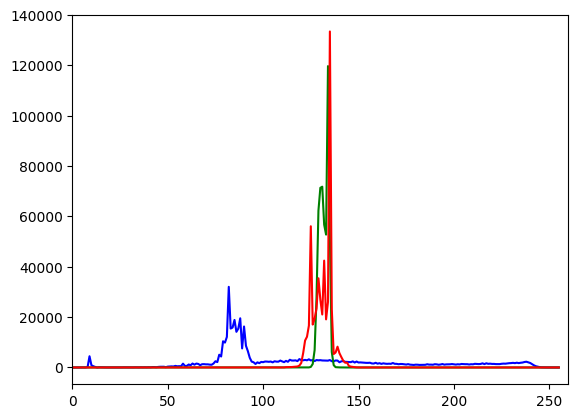

In [5]:
color = ("b", "g", "r")
for i, color in enumerate(color):
    hist = cv2.calcHist([img_lab], [i], None, [256], [0, 256], accumulate=True)
    plt.plot(hist, color = color)
    plt.xlim([0, 260])
plt.show()

Выравнивание гистограммы по L и конвертация в BGR

In [6]:
l, a, b = cv2.split(img_lab)
new_l = cv2.equalizeHist(l)

new_img_lab = cv2.merge((new_l, a, b))

new_img_bgr = cv2.cvtColor(new_img_lab, cv2.COLOR_LAB2BGR)

Диаграмма нового изображения


- Cиний - L
- Зеленый - А
- Красный - B

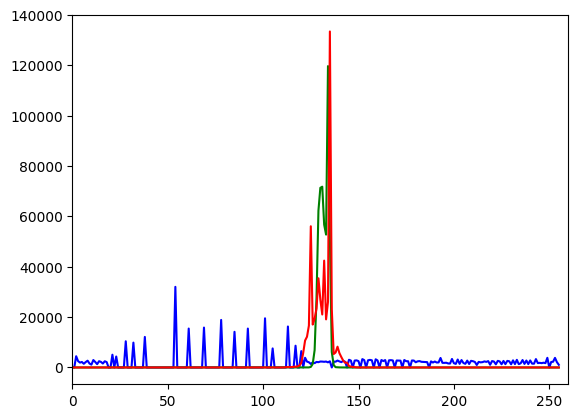

In [7]:
color = ("b", "g", "r")
for i, color in enumerate(color):
    hist = cv2.calcHist([new_img_lab], [i], None, [256], [0, 256], accumulate=False)
    plt.plot(hist, color = color)
    plt.xlim([0, 260])
plt.show()

Результат

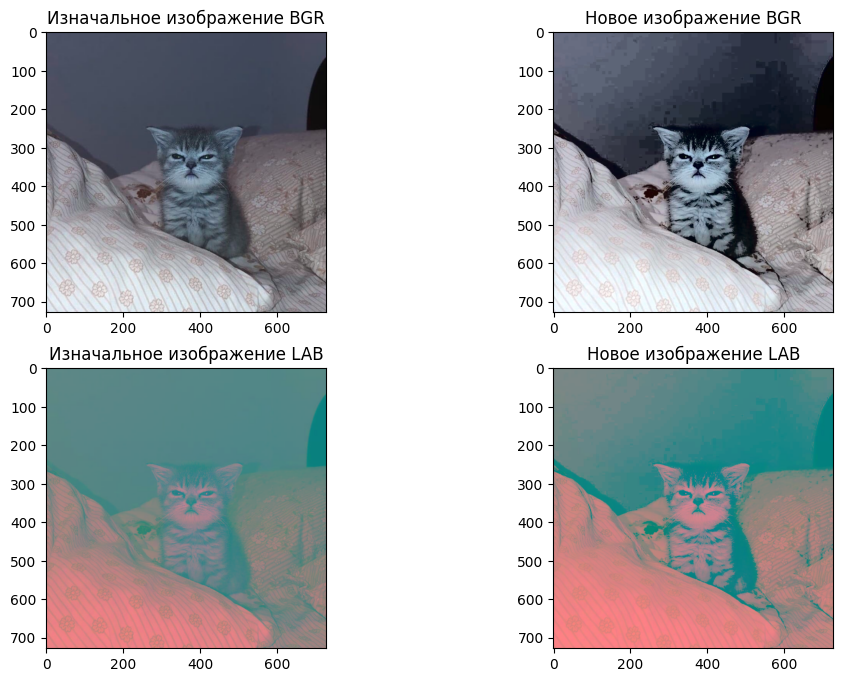

In [8]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(img)
axes[0, 0].set_title('Изначальное изображение BGR')

axes[0, 1].imshow(new_img_bgr)
axes[0, 1].set_title('Новое изображение BGR')

axes[1, 0].imshow(img_lab)
axes[1, 0].set_title('Изначальное изображение LAB')

axes[1, 1].imshow(new_img_lab)
axes[1, 1].set_title('Новое изображение LAB')

fig.set_figwidth(12)
fig.set_figheight(8)

plt.show()

Изображение стало ярче

## Применение фильтров OpenCV к изображению

Исходное изображение

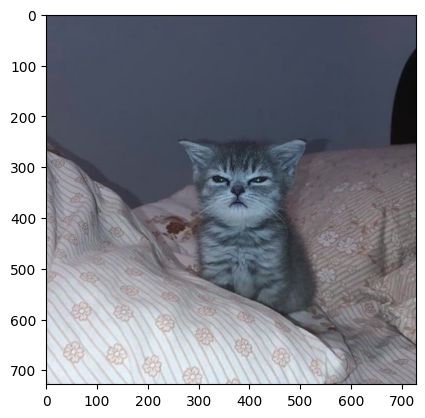

In [10]:
img = cv2.imread("pic.jpg")
plt.imshow(img)

#### Размытие

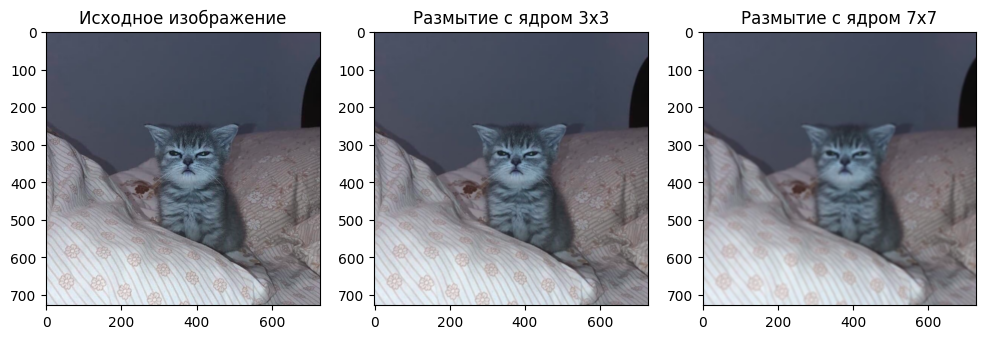

In [34]:
img_blur3 = cv2.blur(img, (3,3))
img_blur7 = cv2.blur(img, (7,7))

fig, axes = plt.subplots(1, 3)

axes[0].imshow(img)
axes[0].set_title('Исходное изображение')

axes[1].imshow(img_blur3)
axes[1].set_title('Размытие с ядром 3х3')

axes[2].imshow(img_blur7)
axes[2].set_title('Размытие с ядром 7х7')

fig.set_figwidth(12)
fig.set_figheight(6)

plt.show()

#### Гауссовское размытие

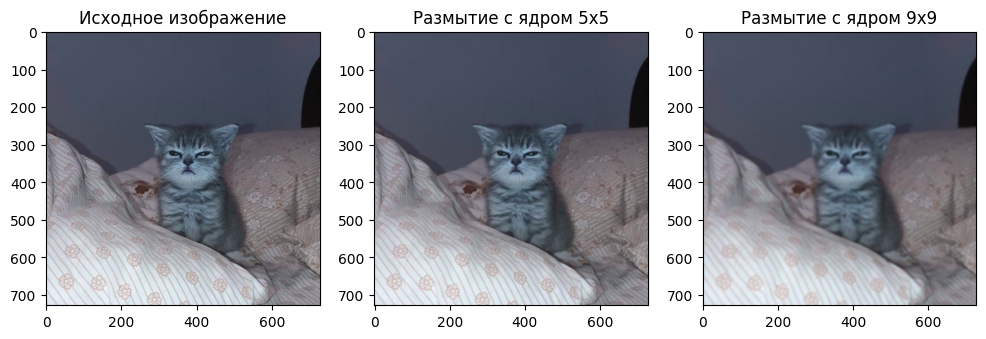

In [33]:
img_blur5 = cv2.GaussianBlur(img, (5,5), 0)
img_blur9 = cv2.GaussianBlur(img, (9,9), 0)

fig, axes = plt.subplots(1, 3)

axes[0].imshow(img)
axes[0].set_title('Исходное изображение')

axes[1].imshow(img_blur3)
axes[1].set_title('Размытие с ядром 5х5')

axes[2].imshow(img_blur7)
axes[2].set_title('Размытие с ядром 9х9')

fig.set_figwidth(12)
fig.set_figheight(6)

plt.show()

#### Оператор Собеля

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


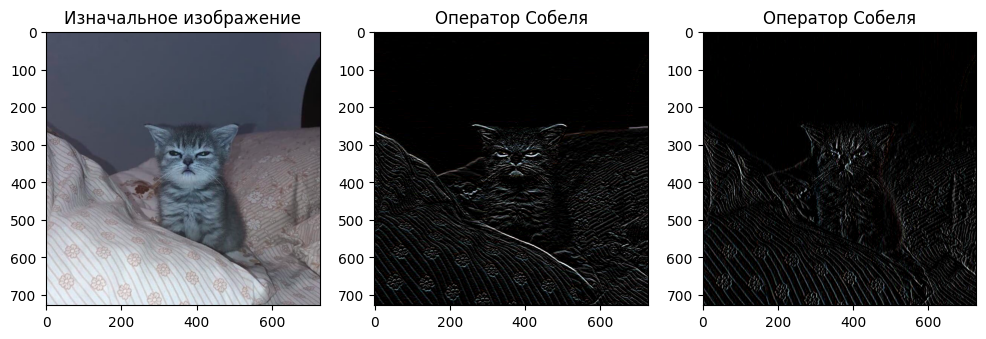

In [32]:
img_sobel201 = cv2.Sobel(img, 2, 0, 1)
img_sobelm110 = cv2.Sobel(img, -1, 1, 0)

fig, axes = plt.subplots(1, 3)

axes[0].imshow(img)
axes[0].set_title('Изначальное изображение')

axes[1].imshow(img_sobel201)
axes[1].set_title('Оператор Собеля')

axes[2].imshow(img_sobelm110)
axes[2].set_title('Оператор Собеля')

fig.set_figwidth(12)
fig.set_figheight(6)

plt.show()

#### Оператор Лапласа

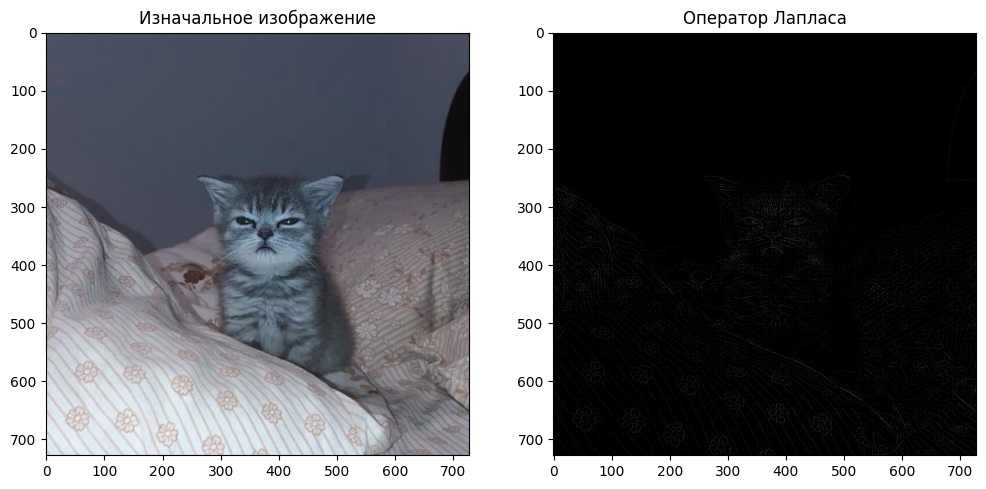

In [44]:
img_lap = cv2.Laplacian(img, 10, (5,5))

fig, axes = plt.subplots(1, 2)

axes[0].imshow(img)
axes[0].set_title('Изначальное изображение')

axes[1].imshow(img_lap)
axes[1].set_title('Оператор Лапласа')

fig.set_figwidth(12)
fig.set_figheight(6)

plt.show()

#### Медиана

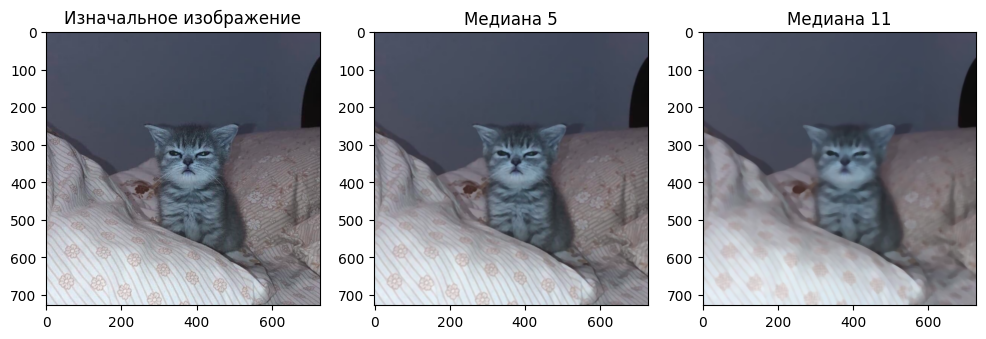

In [48]:
img_med5 = cv2.medianBlur(img, 5)
img_med11 = cv2.medianBlur(img, 11)

fig, axes = plt.subplots(1, 3)

axes[0].imshow(img)
axes[0].set_title('Изначальное изображение')

axes[1].imshow(img_med5)
axes[1].set_title('Медиана 5')

axes[2].imshow(img_med11)
axes[2].set_title('Медиана 11')

fig.set_figwidth(12)
fig.set_figheight(6)

plt.show()

#### bilateral фильтер

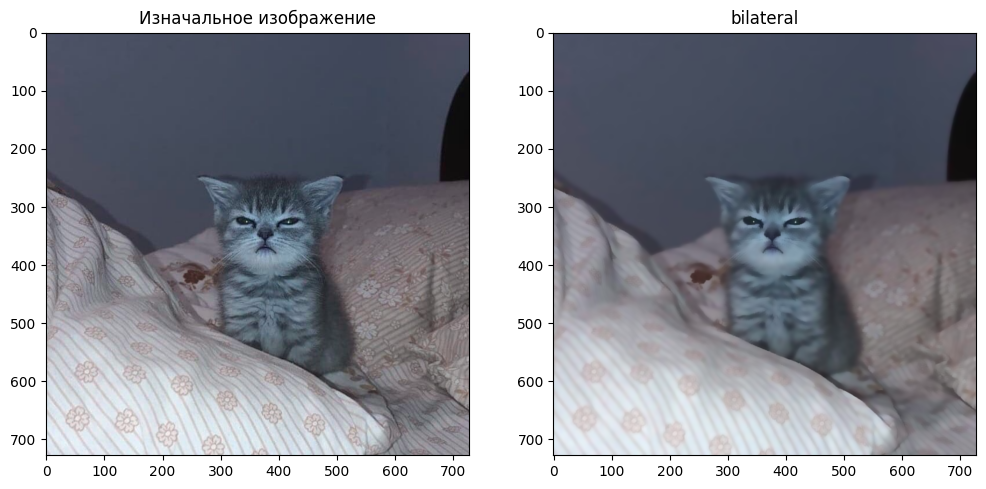

In [52]:
img_1 = cv2.bilateralFilter(img, 11, 99, 76)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(img)
axes[0].set_title('Изначальное изображение')

axes[1].imshow(img_1)
axes[1].set_title('bilateral')

fig.set_figwidth(12)
fig.set_figheight(6)

plt.show()

#### Морфология

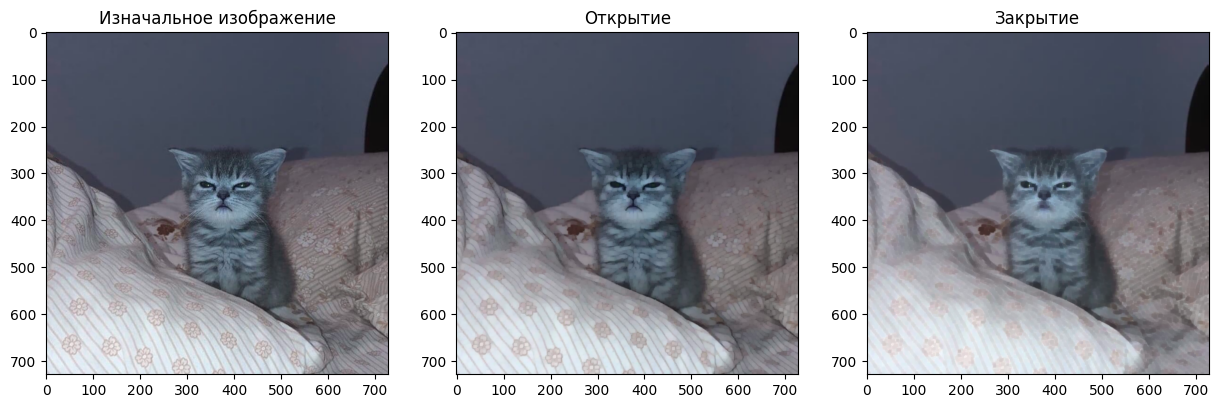

In [67]:
img_1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((5,5),np.uint8))
img_2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,5),np.uint8))

fig, axes = plt.subplots(1, 3)

axes[0].imshow(img)
axes[0].set_title('Изначальное изображение')

axes[1].imshow(img_1)
axes[1].set_title('Открытие')

axes[2].imshow(img_2)
axes[2].set_title('Закрытие')

fig.set_figwidth(15)
fig.set_figheight(10)

plt.show()